In [1]:

import pandas as pd
import numpy as np
import scipy as sp
import pulp
from scipy.optimize import linprog
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpMinimize
import matplotlib.pyplot as plt
import seaborn as sns
from pydantic import BaseModel
import sys
import os

# Now you can import the create_athlete function
from athlete_manager import create_athlete, get_athlete

from Diet_Solver_Library import solve_maintenance_model, solve_PSMF_model


In [2]:
# Use the function to create a new athlete
create_athlete(
    name='Markos', 
    weight_lbs=194, 
    bf_percent=0.17, 
    caloric_multiplier=15.1, 
    extra_caloric_multiplier=1, 
    extra_psmf_multiplier=1
)
athlete = get_athlete('Markos')
if athlete:
    print(f"Retrieved athlete: {athlete}")
else:
    print("Athlete not found.")

Overwriting existing entry for Markos.
Athlete Markos saved successfully.
Retrieved athlete: Name='Markos' Weight_lbs=194.0 BF_Percent=0.17 Caloric_Multiplier=15.1 Extra_Caloric_Multiplier=1.0 extra_PSMF_multiplier=1.0


status: 1, Optimal
TOTAL COST OF DAILY DIET CALCULATED:	$5.0
TOTAL COST OF MONTHLY DIET CALCULATED:	$150.0

CONSISTING OF THE FOLLOWING FOODS:
Perdue, No Antibiotics Ever, Fresh Chicken Leg Quarters, 10 lb. Bag USA                        : 432 g               $0.74     Meats
Perdue, Fresh Chicken Gizzards (May Contain Hearts), 1.25 lb. Cup USA                          : 369 g               $0.85     Meats
Great Value Lentils, 1 lb USA                                                                  : 247 g               $0.73     Beans and Lentils
Popcorn Kernels USA 2 lb                                                                       : 198 g               $0.50     Snacks
Carrots USA                                                                                    : 112 g               $0.24     Vegetables
Great Value Fat-Free Singles Pasteurized Process Cheese Product, 12 oz, 16 Count USA           : 85 g                $0.49     Dairy and Egg Products
Great Value Reduced-Fat 

c:\github\Linear Optimization - Diet\Diet_Solver_Library.py:605: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


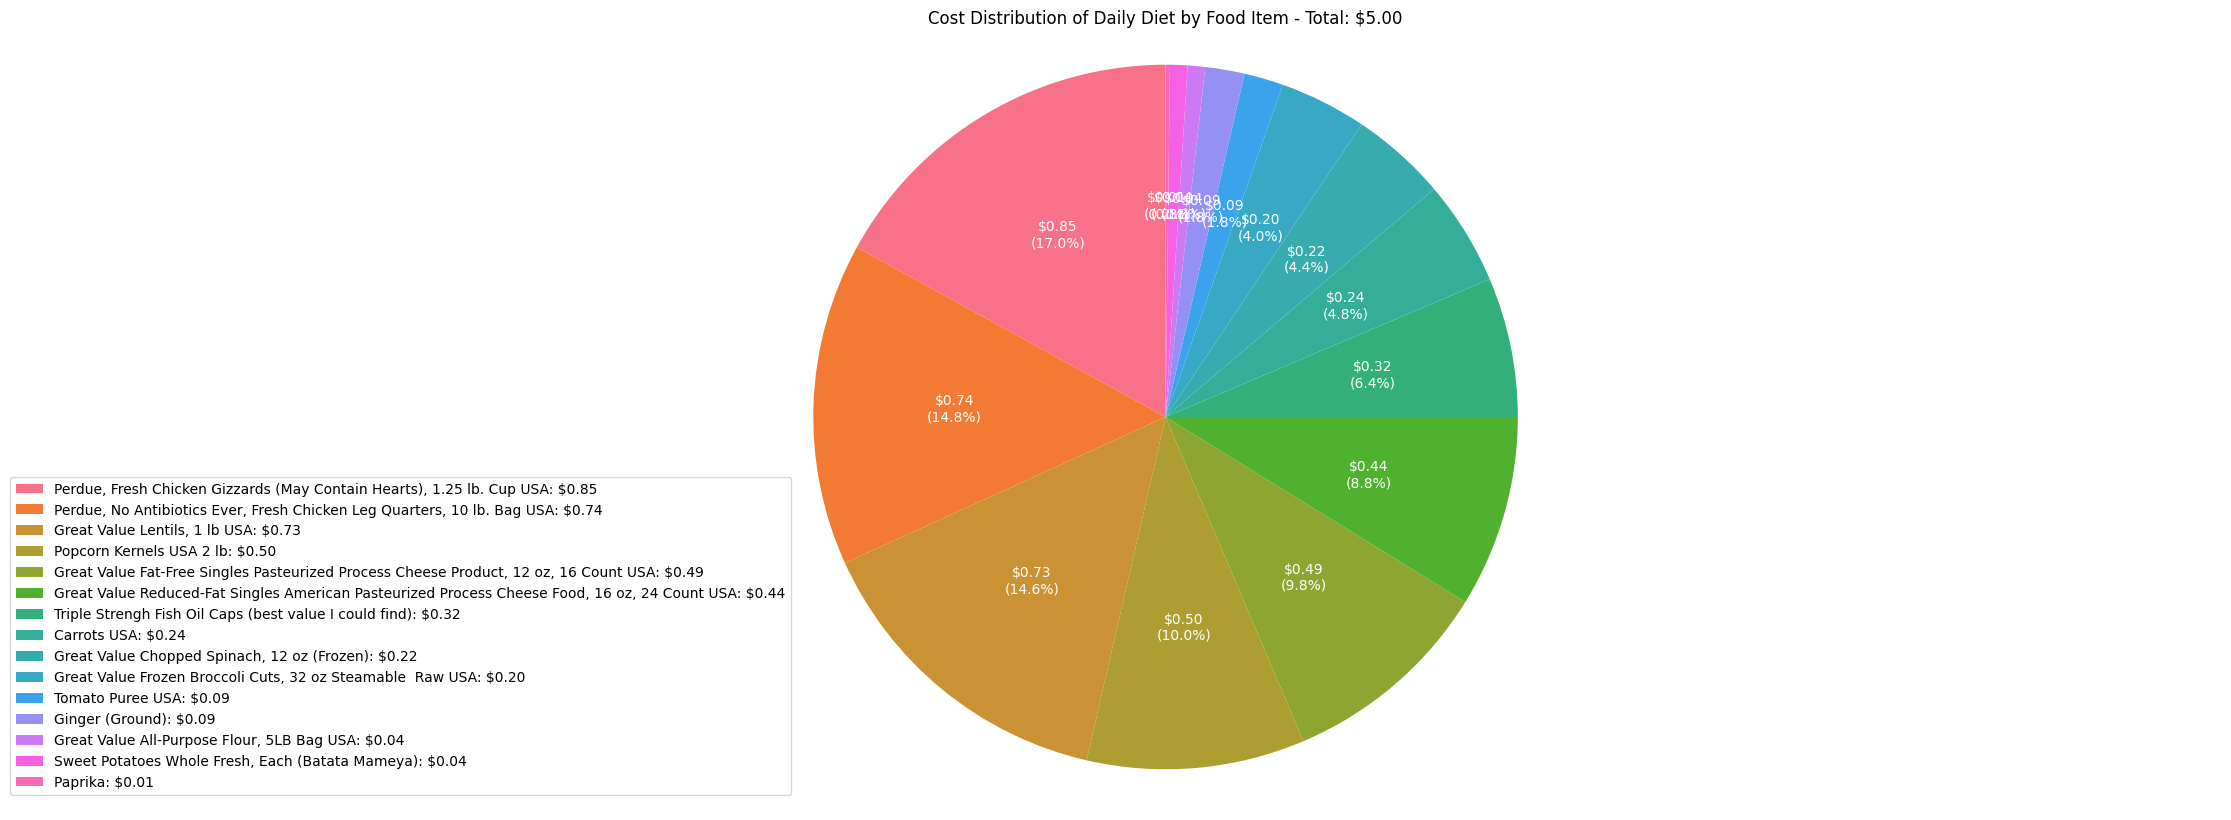


ERROR PER CONSTRAINT EQUATION:
Maintenance Calories Equality Constraint               	2929	==	2929
Protein Minimum Constraint                             	242	>=	242
Net Carb Minimum Constraint                            	296	>=	234,	61.16
Fiber Lower Bound Constraint                           	60	>=	30,	30.0
Fiber Upper Bound Constraint                           	60	<=	60
Fat Lower Bound Constraint                             	81	>=	81
Fat Upper Bound Constraint                             	81	<=	114,	32.55
Protein Quality Minimum Constraint                     	77	>=	0,	77.08
Sugar Maximum Constraint                               	7	<=	75,	67.61
SatFat Maximum Constraint                              	-24	<=	0,	23.88
Calcium Lower Bound Constraint                         	1500	>=	1500
Calcium Upper Bound Constraint                         	1500	<=	2000,	500.0
Iron Lower Bound Constraint                            	40	>=	30,	10.0
Iron Upper Bound Constraint                           

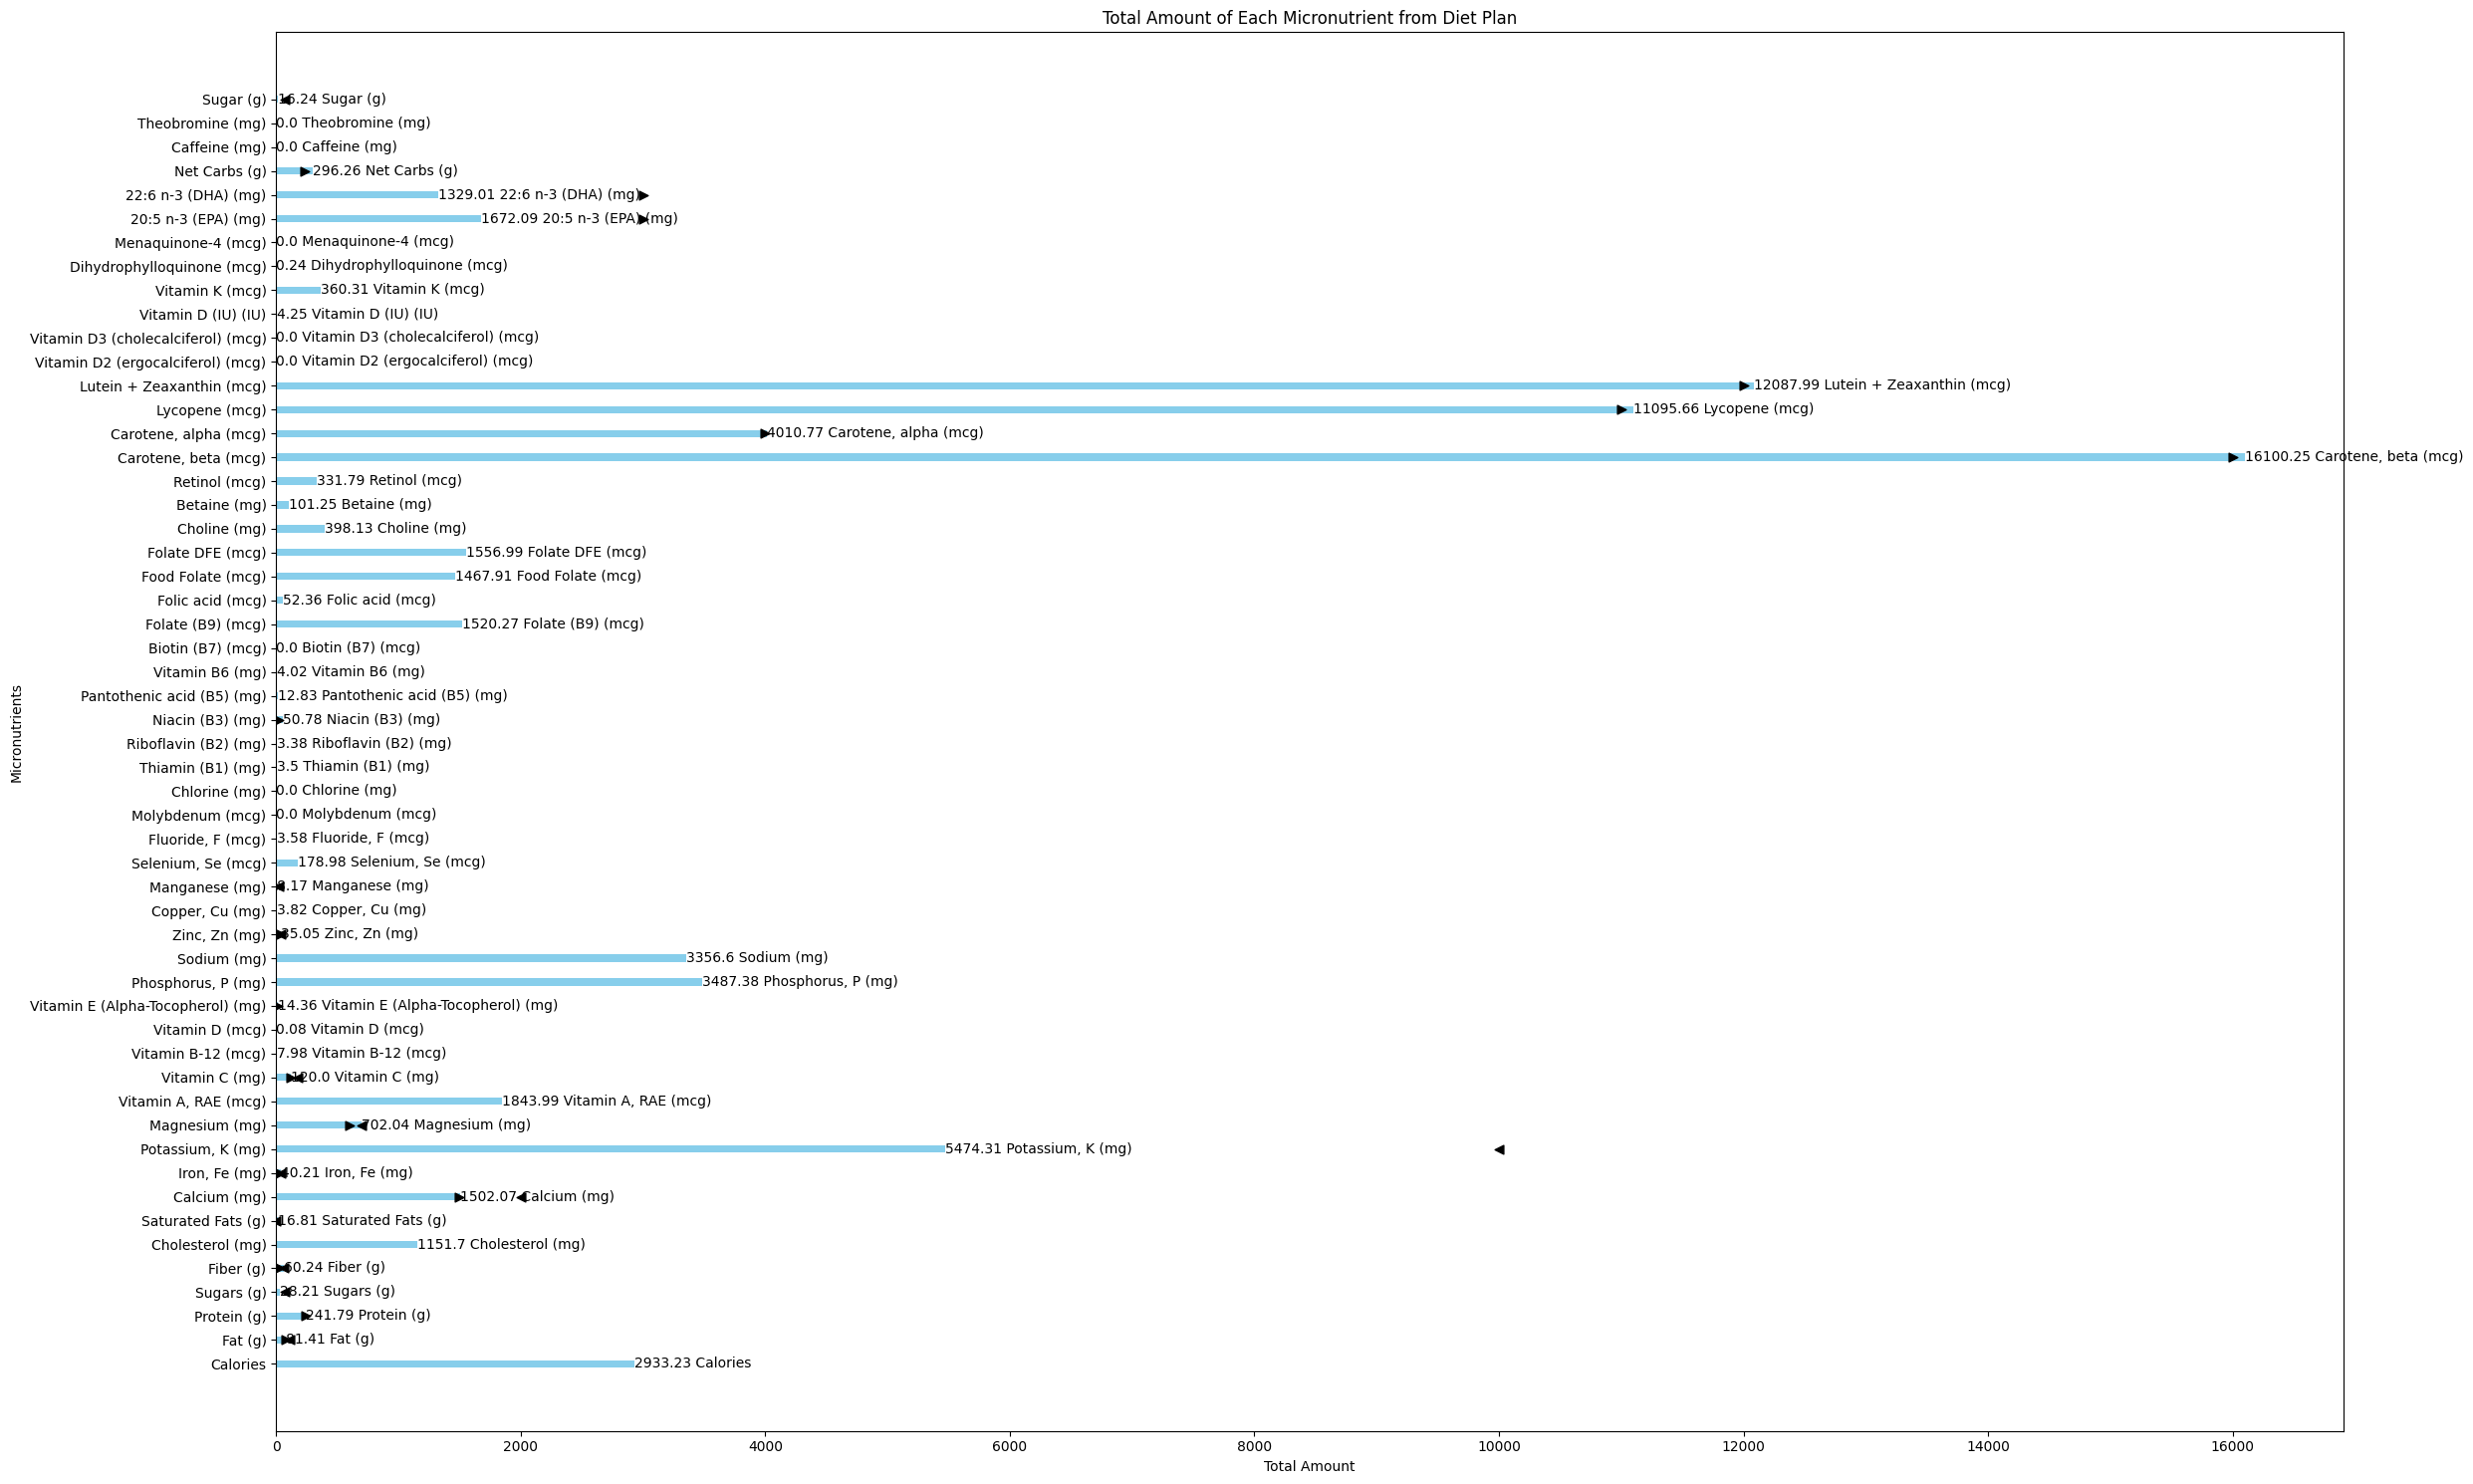

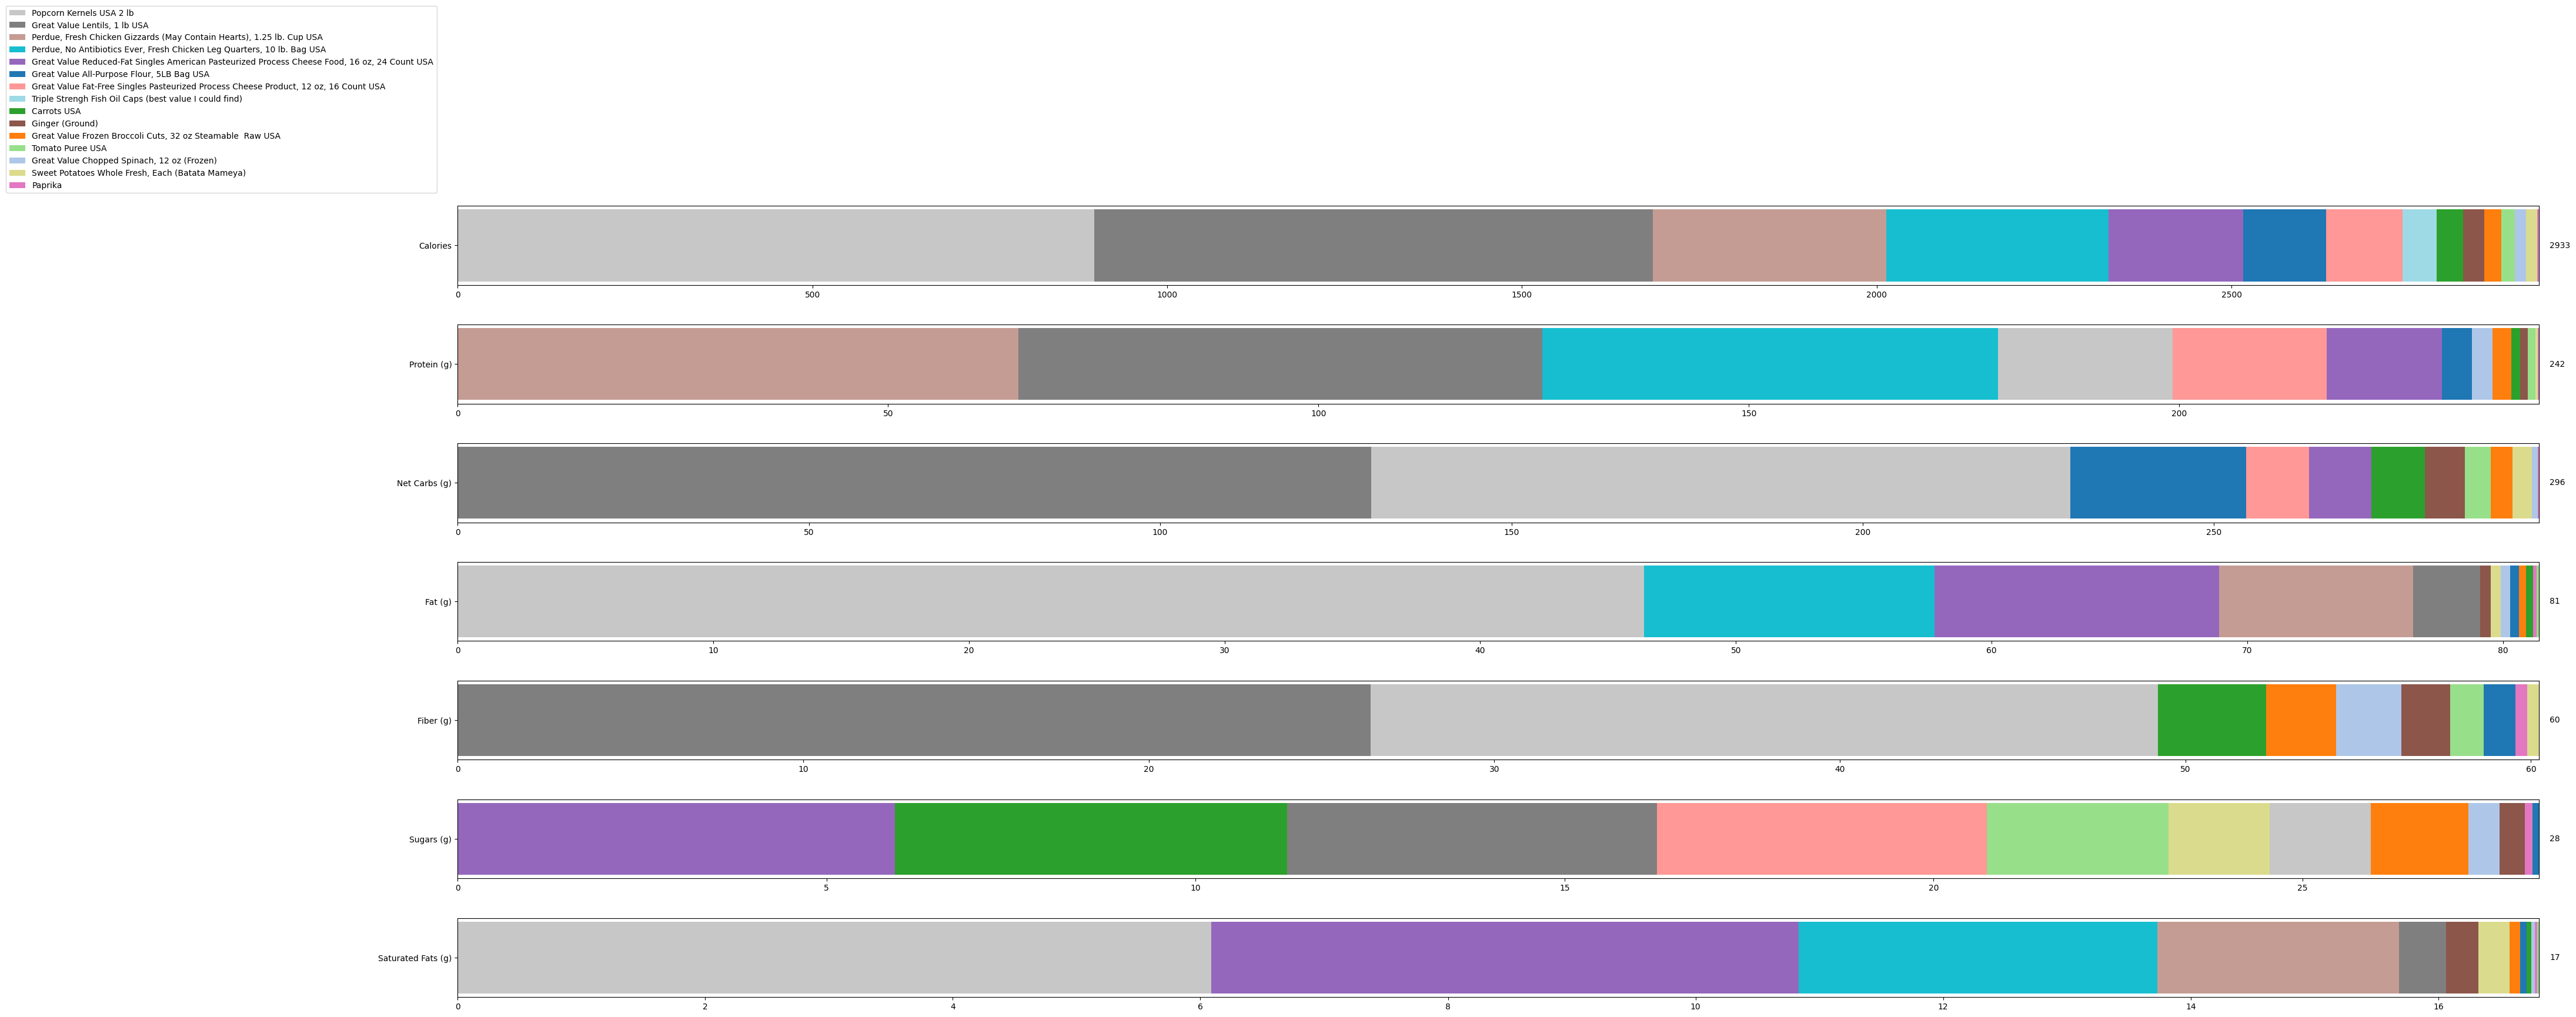

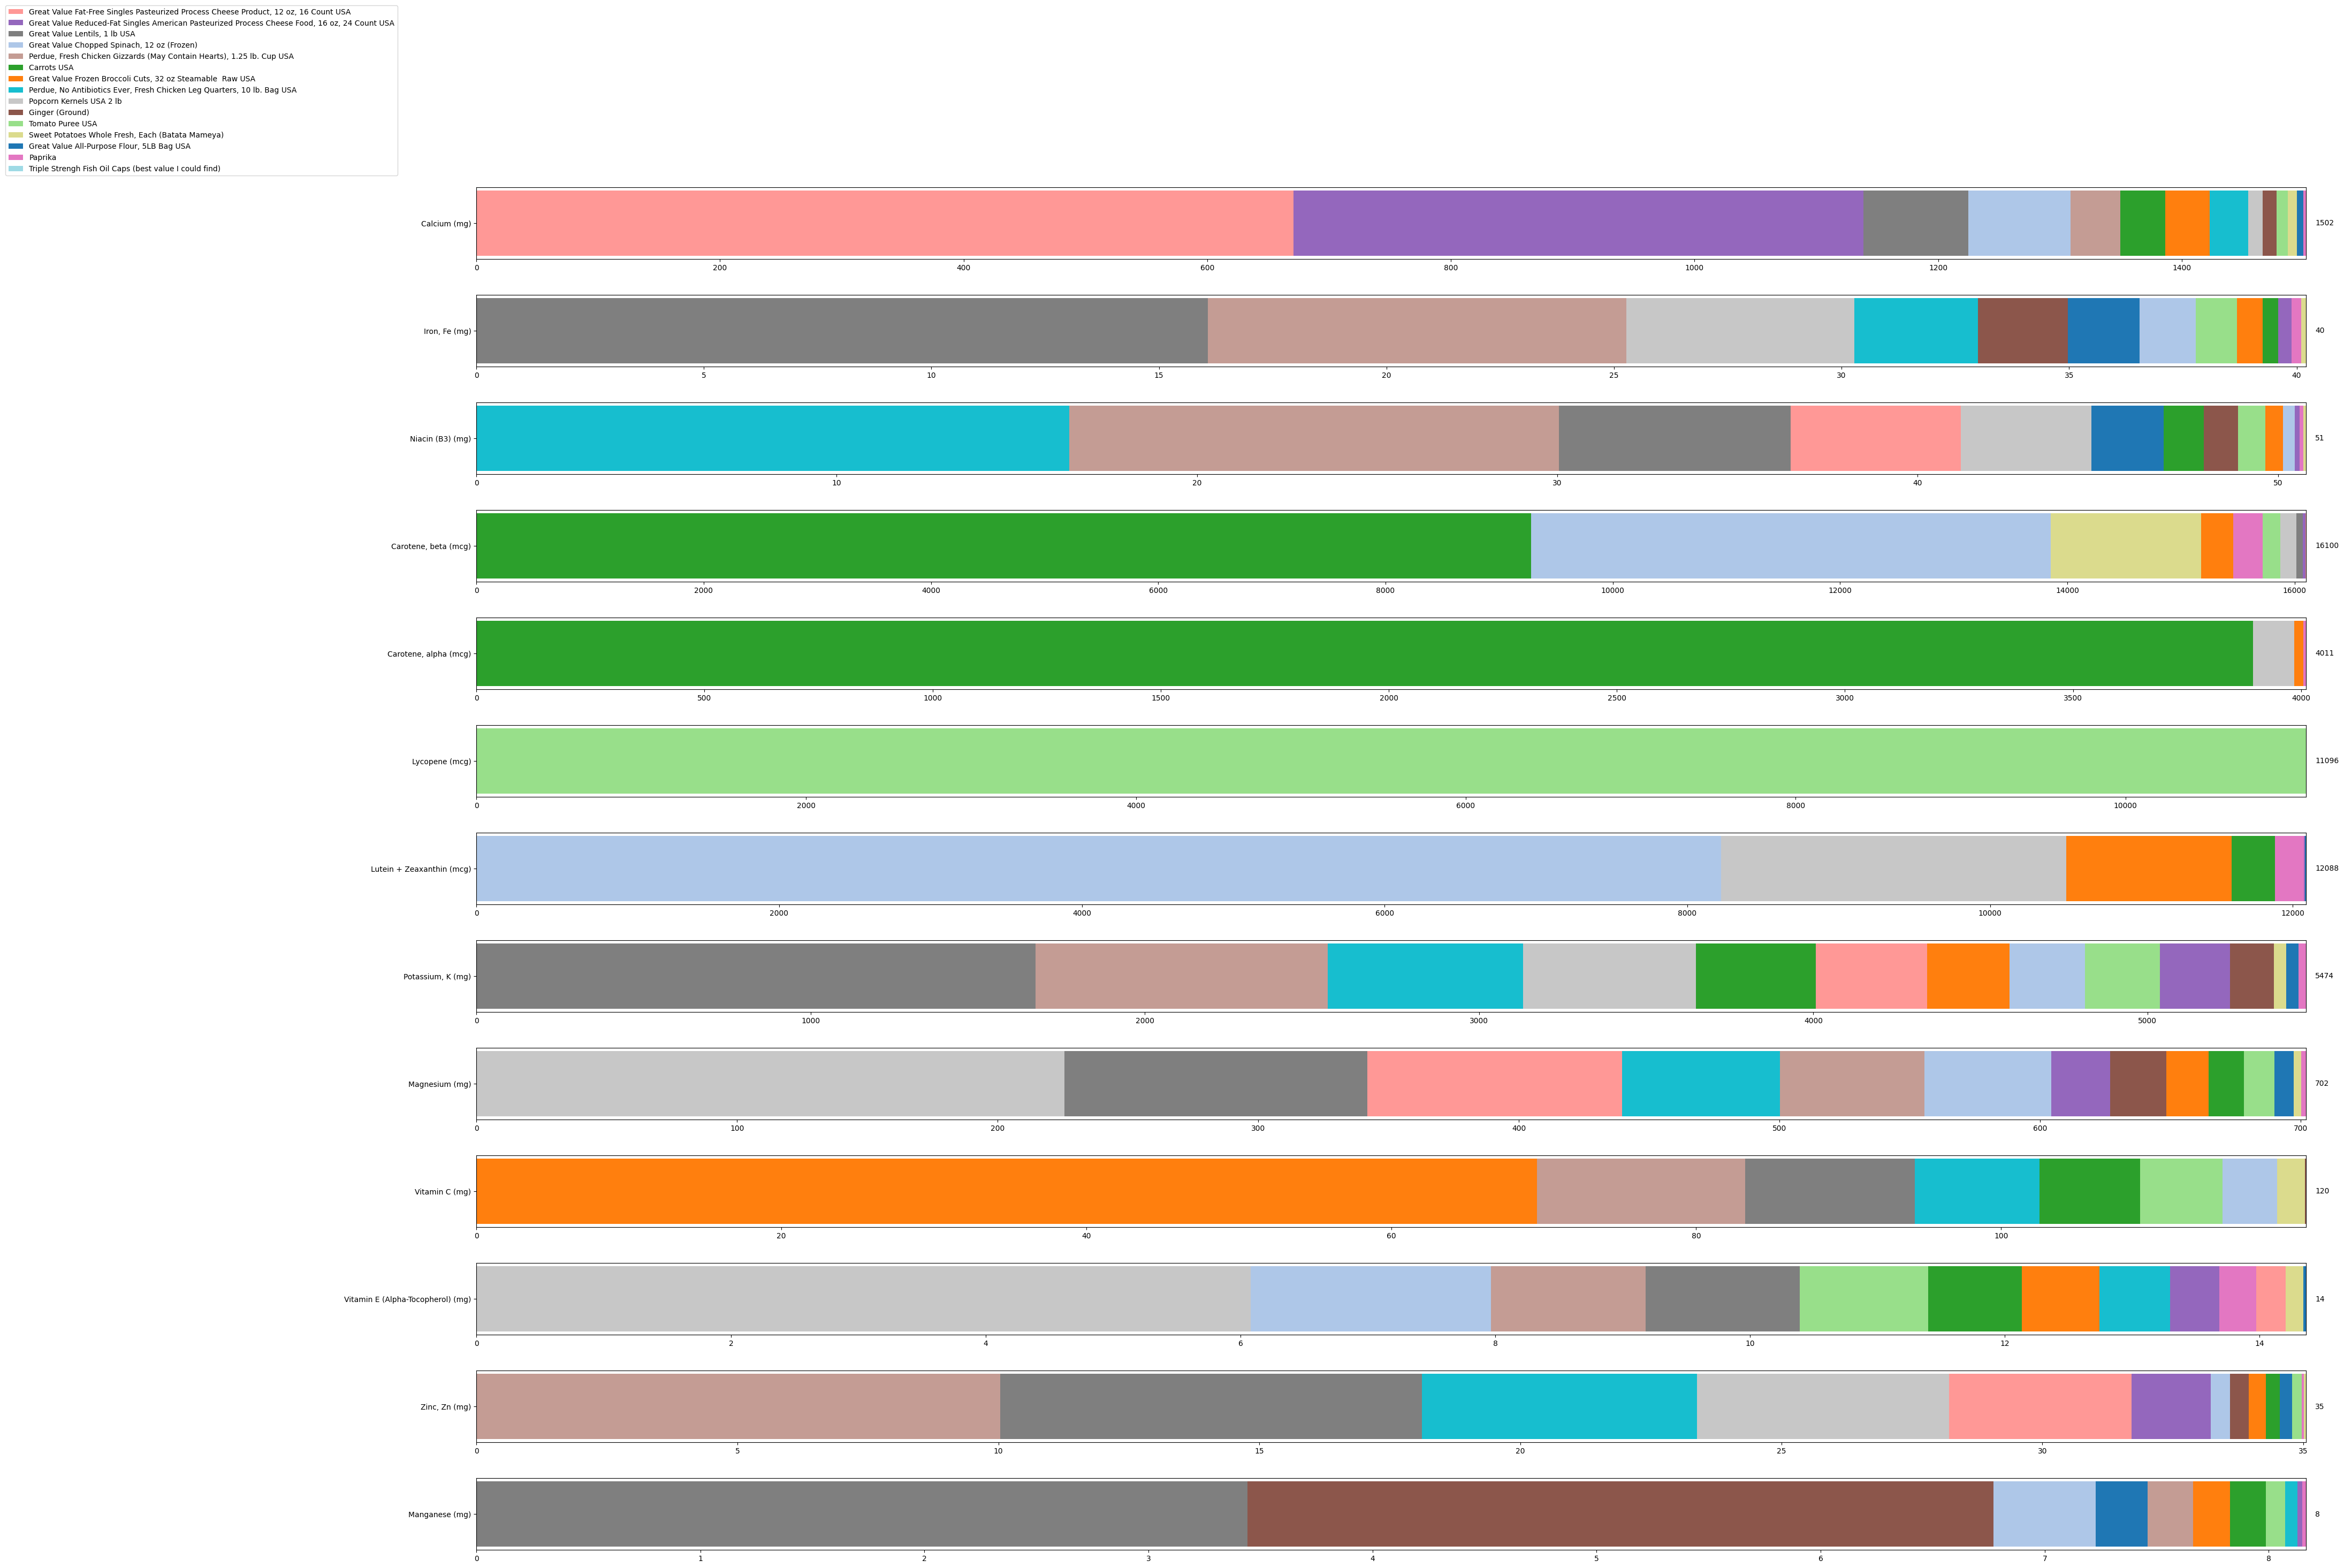

In [3]:
solve_maintenance_model('Markos')

status: 1, Optimal
TOTAL COST OF DAILY DIET CALCULATED:	$3.72
TOTAL COST OF MONTHLY DIET CALCULATED:	$111.6

CONSISTING OF THE FOLLOWING FOODS:
Perdue, Fresh Chicken Gizzards (May Contain Hearts), 1.25 lb. Cup USA                          : 1385 g              $3.21     Meats
Great Value Navy Beans, 1 lb USA                                                               : 64 g                $0.19     Beans and Lentils
Great Value Lentils, 1 lb USA                                                                  : 1 g                 $0.00     Beans and Lentils
Triple Strengh Fish Oil Caps (best value I could find)                                         : 3 caps              $0.32     Supplements


c:\github\Linear Optimization - Diet\Diet_Solver_Library.py:28: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


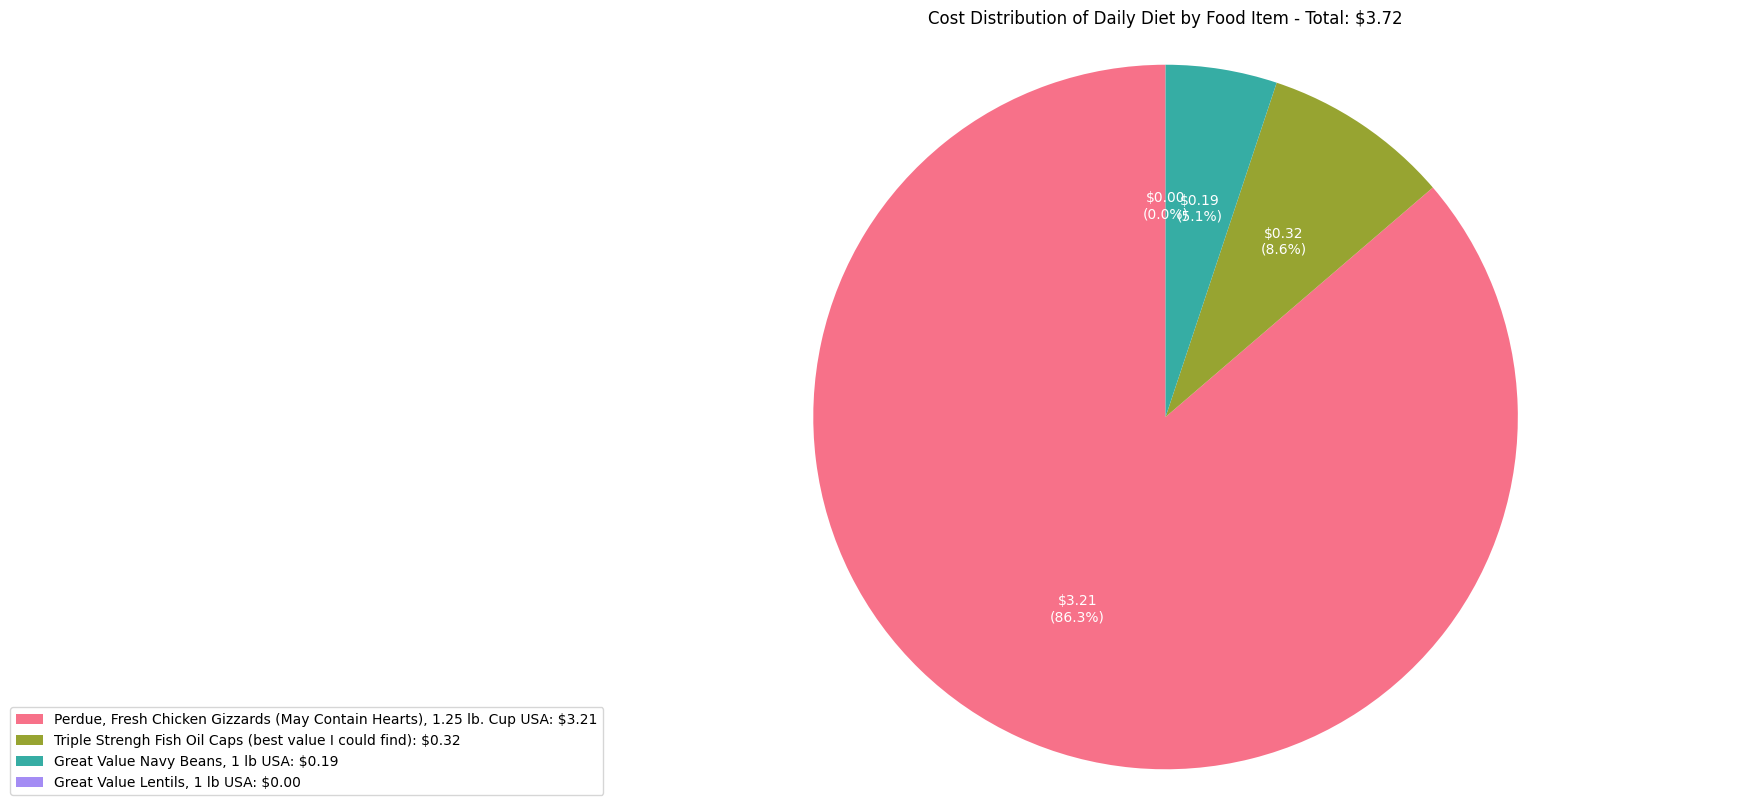


ERROR PER CONSTRAINT EQUATION:
Protein Minimum Constraint                             	259	>=	259
Net Carb Maximum Constraint                            	30	<=	30
Fiber Minimum Constraint                               	10	>=	10
Fat Maximum Constraint                                 	30	<=	50,	20.5
Protein Quality Minimum Constraint                     	141	>=	0,	140.82
Fish Oils Minimum Constraint                           	3000	>=	3000

CONSISTING OF THE FOLLOWING FOODS:
Perdue, Fresh Chicken Gizzards (May Contain Hearts), 1.25 lb. Cup USA                          : 1385 g              $3.21     Meats
Great Value Lentils, 1 lb USA                                                                  : 1 g                 $0.00     Beans and Lentils
Great Value Navy Beans, 1 lb USA                                                               : 64 g                $0.19     Beans and Lentils
Triple Strengh Fish Oil Caps (best value I could find)                                         : 3 

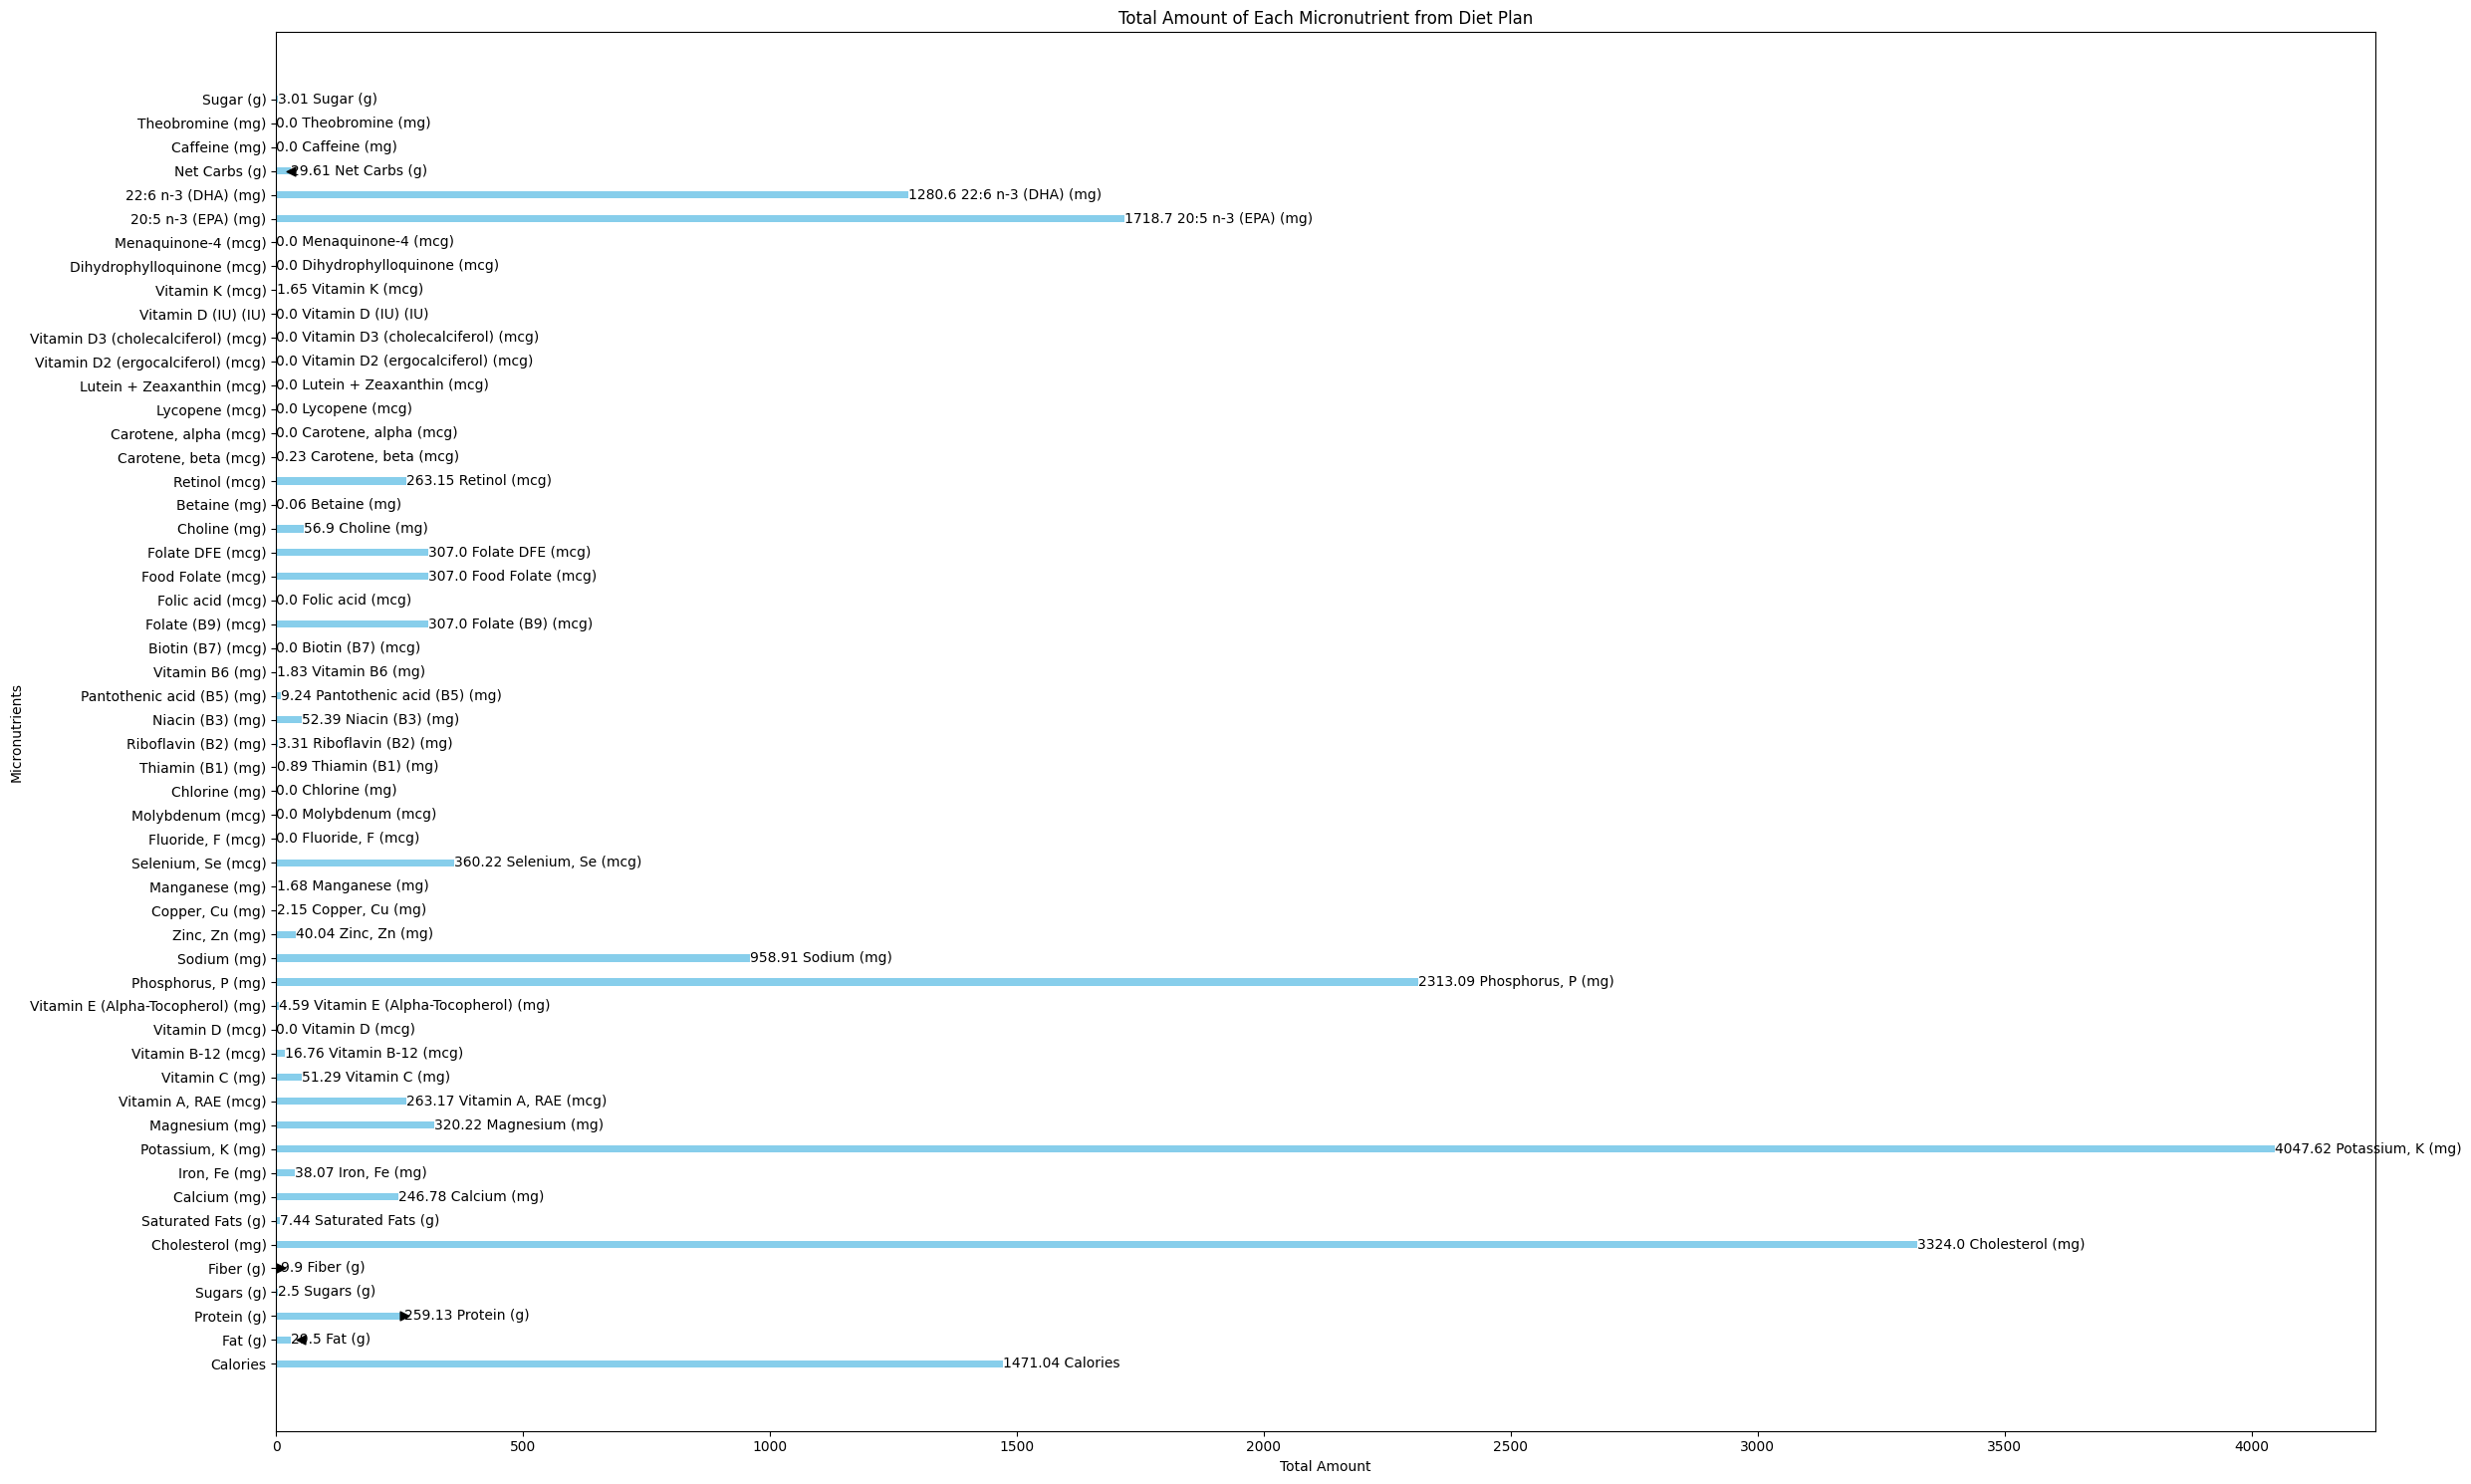

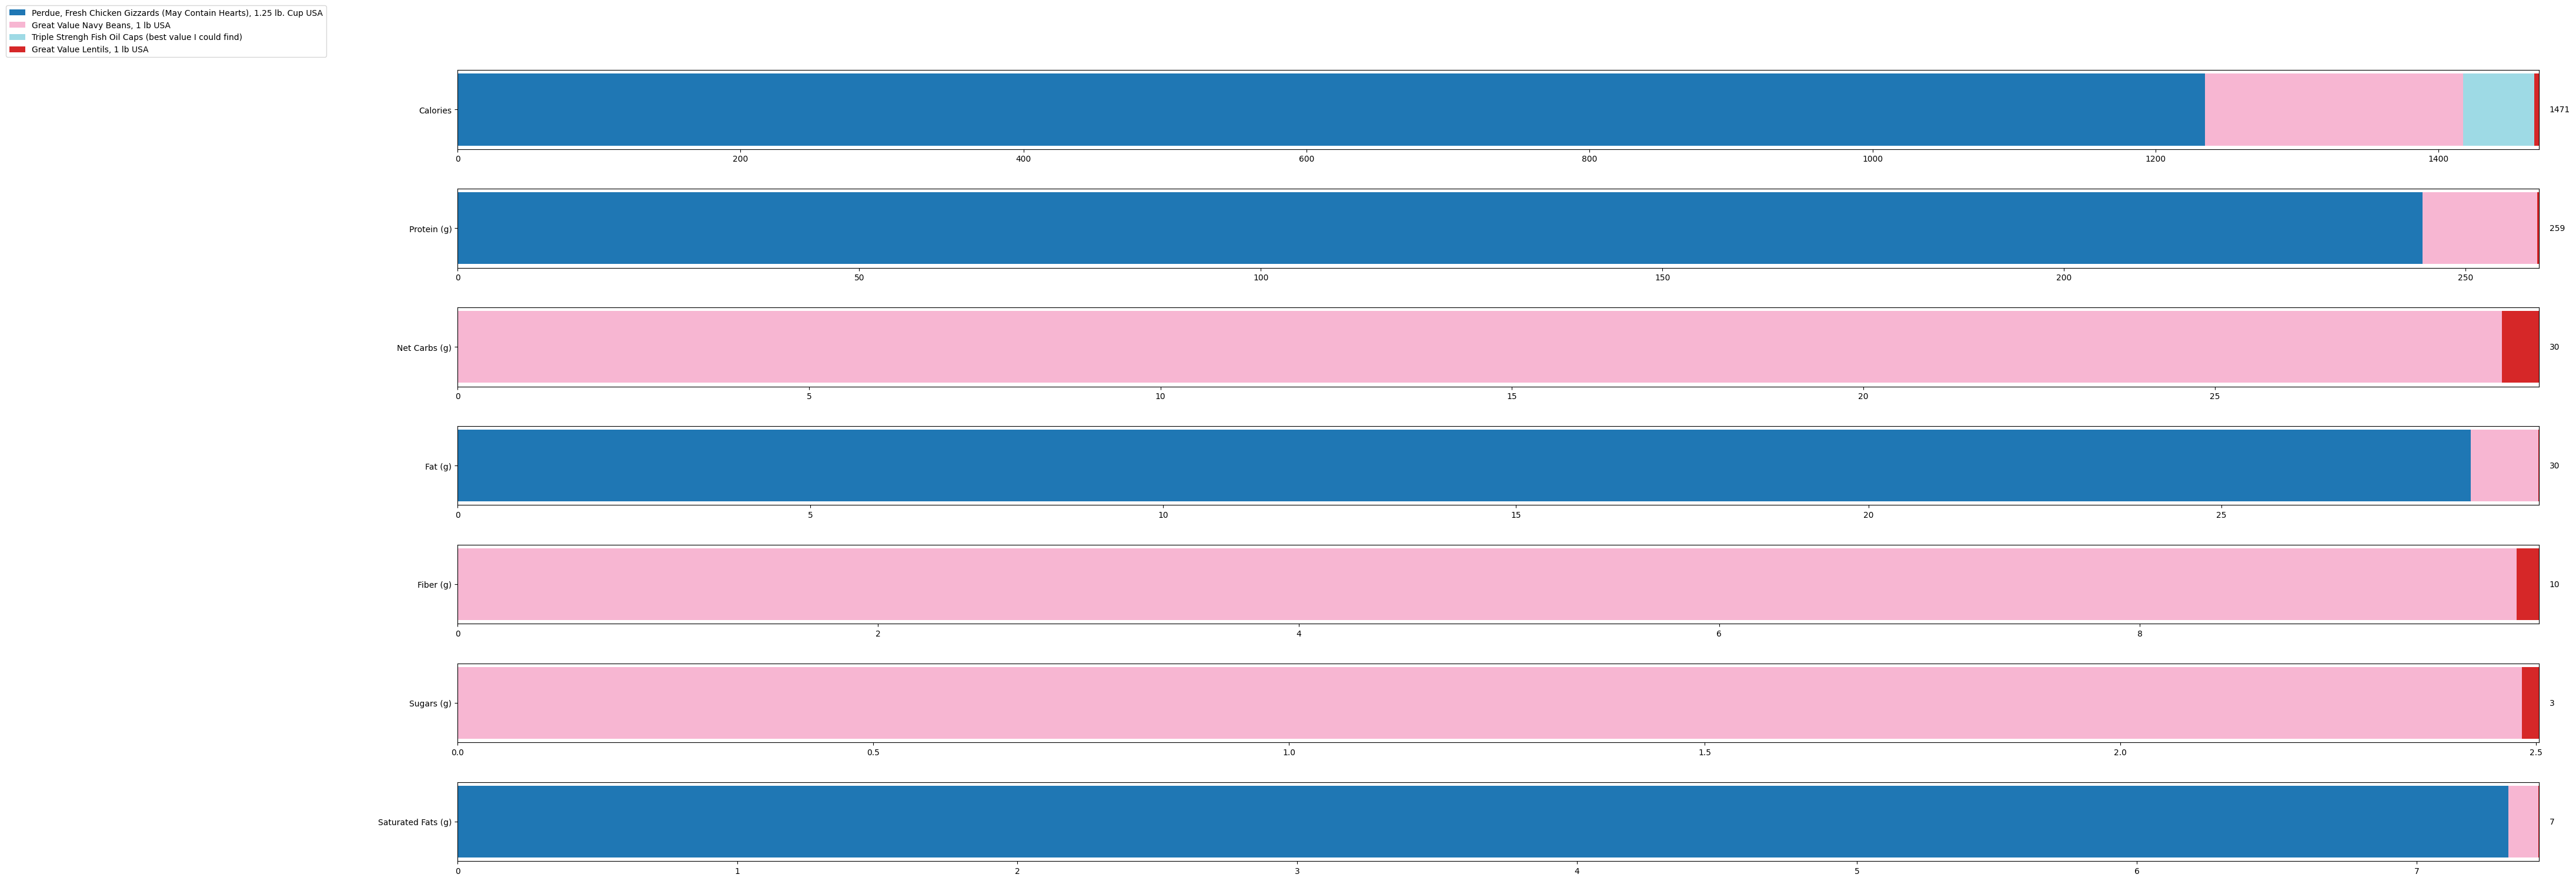

c:\github\Linear Optimization - Diet\Diet_Solver_Library.py:562: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(0, total_contributions[nutrient])


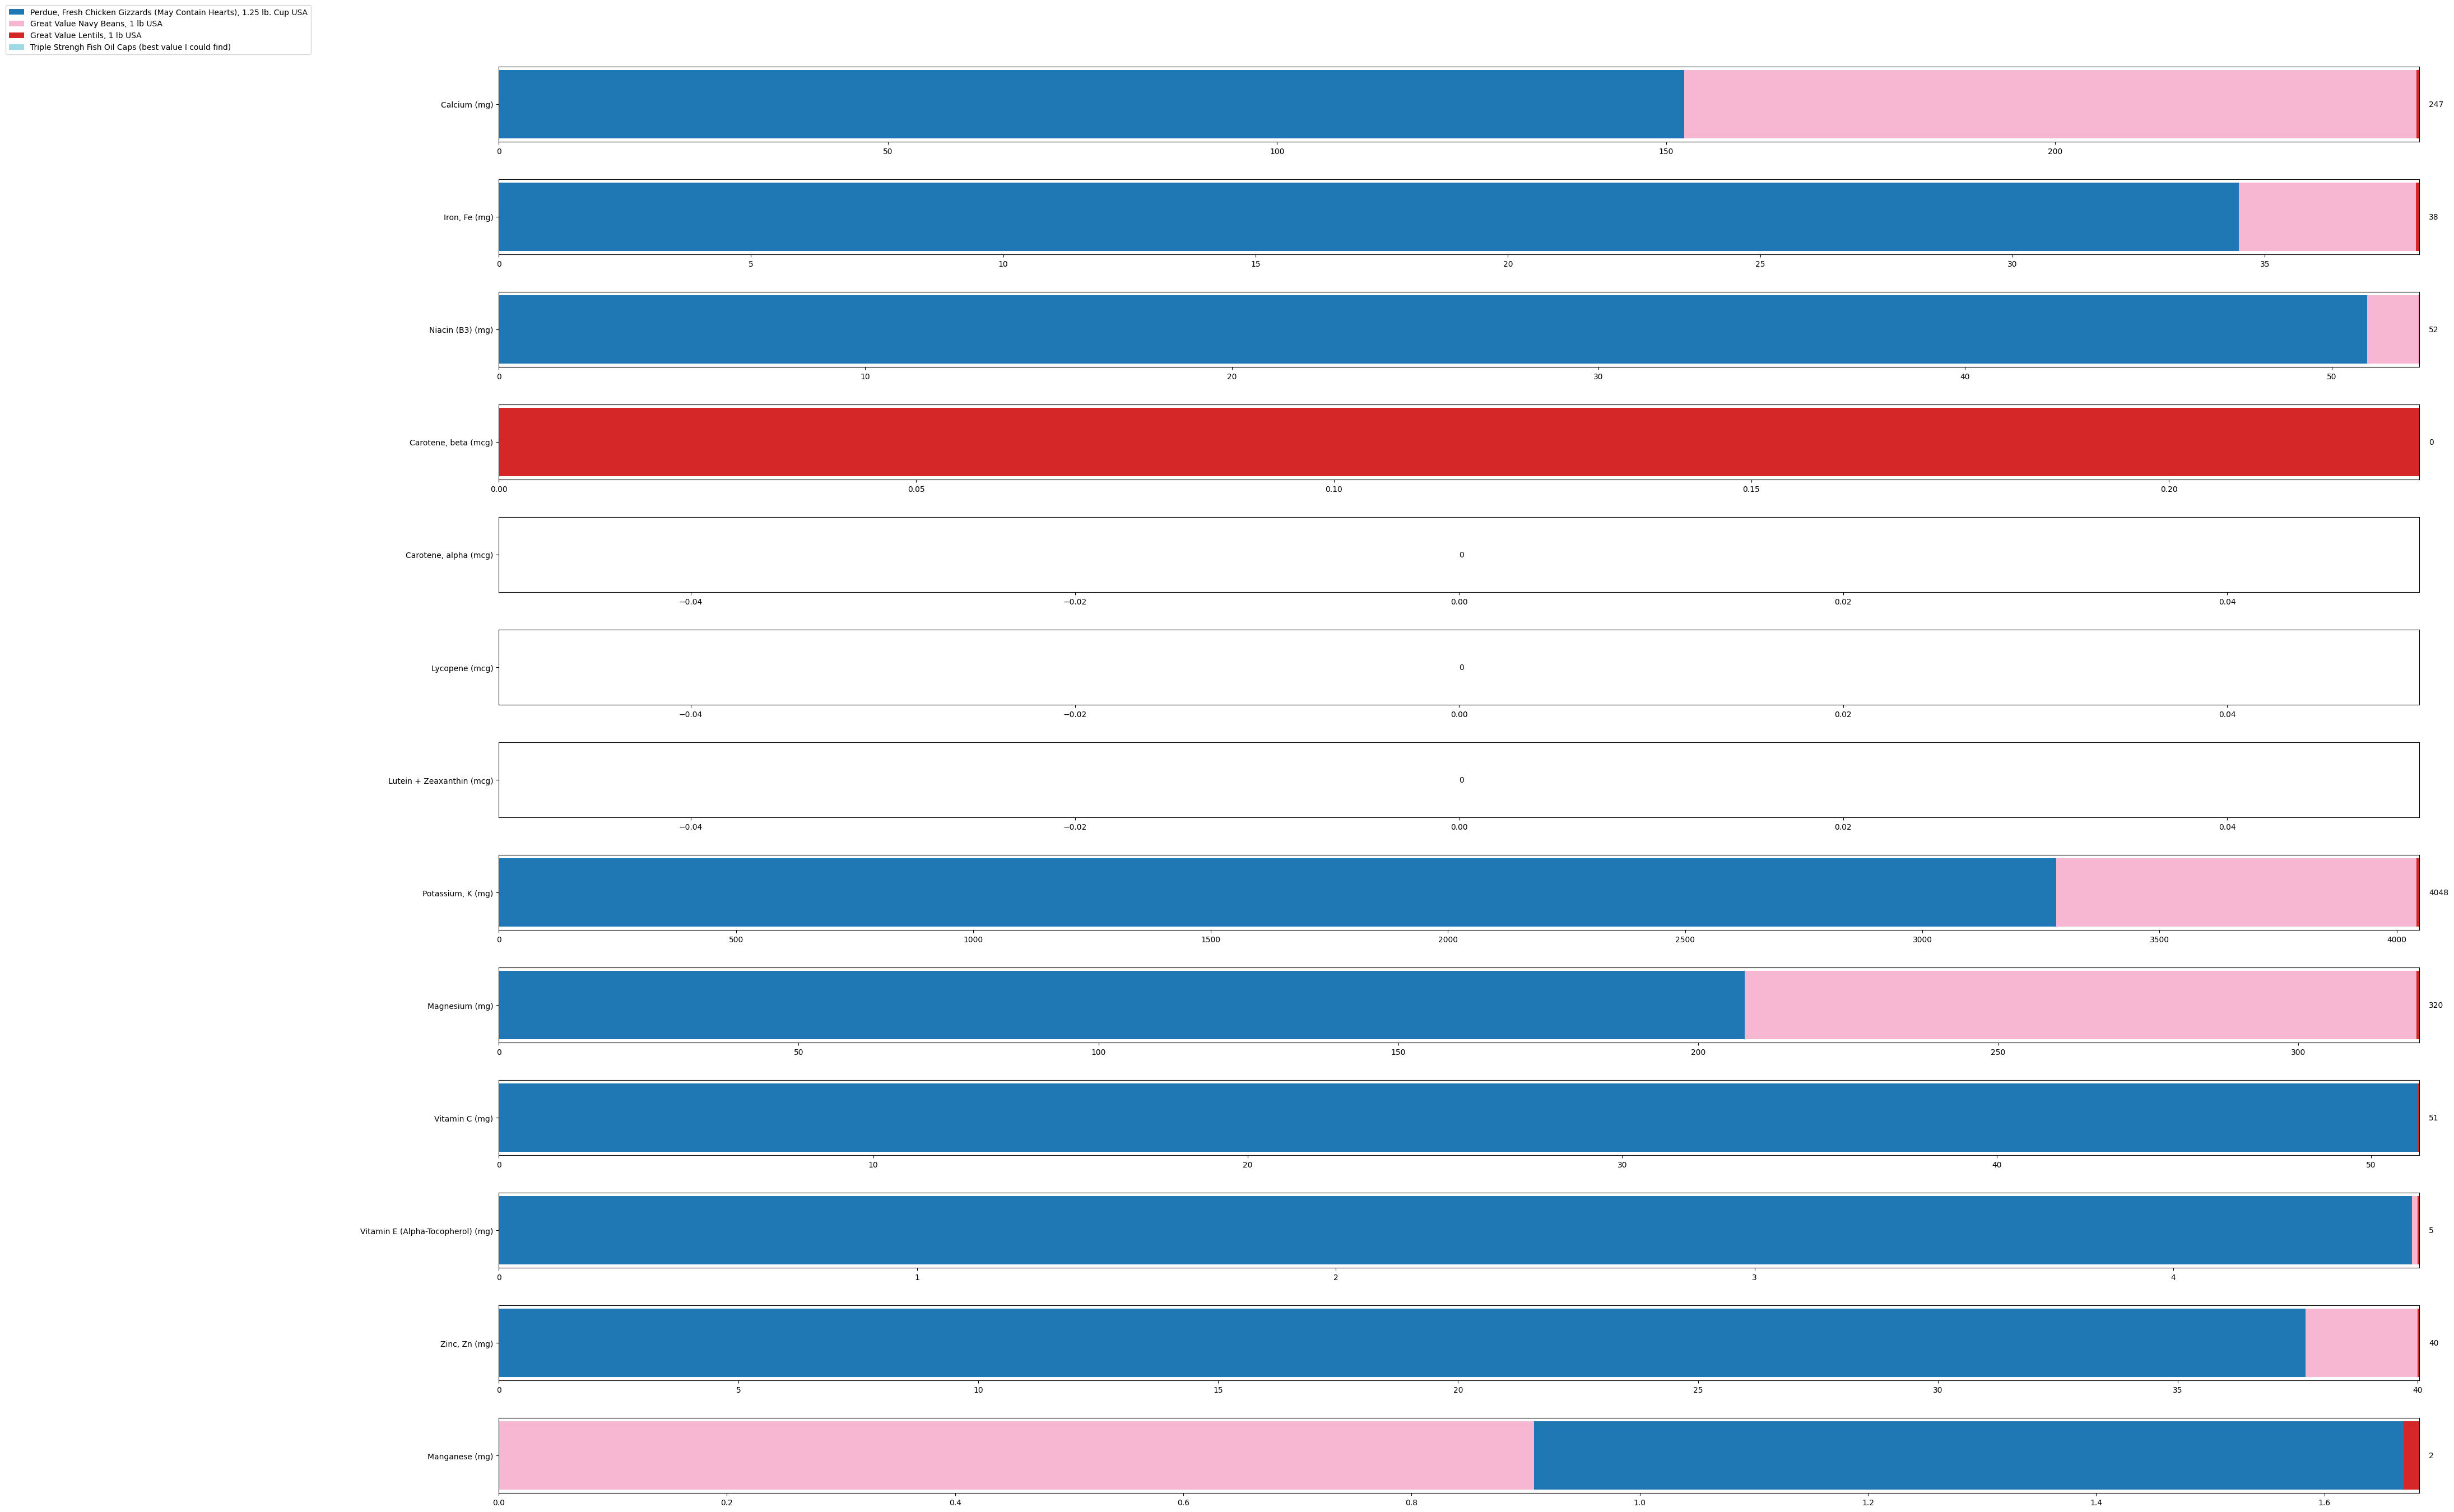

In [4]:
solve_PSMF_model('Markos')